In [141]:
import json

In [150]:
with open('../logs/comment_lengths.json') as infile: 
    d = json.load(infile)
    
d = {int(k):int(v) for k,v in d.items()}

s = 0
total = sum(d.values())
for key in sorted(d.keys()): 
    s += d[key]
    print(key, s/float(total))

(0, 0.25626126730646803)
(10, 0.4855062364321265)
(20, 0.6246844310307076)
(30, 0.7127267329305573)
(40, 0.7720578262673478)
(50, 0.8142941143010052)
(60, 0.8457167153406306)
(70, 0.8697934037392775)
(80, 0.8893621278840224)
(90, 0.9043759995879747)
(100, 0.9164975452662855)
(110, 0.9274624717157824)
(120, 0.9362291649849463)
(130, 0.9438234689826864)
(140, 0.9501584111328695)
(150, 0.9555100199237875)
(160, 0.9600181424055417)
(170, 0.9637428524193791)
(180, 0.9673504210799162)
(190, 0.9709118663215155)
(200, 0.9735133431833688)
(210, 0.9758356797425021)
(220, 0.9779118928774233)
(230, 0.9802176155120679)
(240, 0.9819426683001758)
(250, 0.9834994457673905)
(260, 0.9849072517116891)
(270, 0.9861030323339407)
(280, 0.9870618931187208)
(290, 0.9881755798569509)
(300, 0.9889583857847676)
(310, 0.9897323045815482)
(320, 0.9903253162005622)
(330, 0.9909320145287979)
(340, 0.9915126843753345)
(350, 0.9920003689873516)
(360, 0.992418987141851)
(370, 0.9928109175319335)
(380, 0.993144119017513

In [153]:
import pandas as pd

In [193]:
# there is a line for commas that is bad
df = pd.read_csv('~/ingroup_lang/logs/vocabs/10_1', 
                 error_bad_lines=False, engine="python",
                 names=['word','frequency','num_subs']) 
df_broad = df[df['num_subs'] > 350]
print(len(df_broad))
df_broad_common = df_broad[df_broad['frequency'] > 500]
print(len(df_broad_common))
df_broad_common.to_csv('~/ingroup_lang/logs/vocabs/10_1_filtered', 
                       index=False, header=False, columns=['word'])

Skipping line 15299: field larger than field limit (131072)


11307
11307


Skipping line 48774: Expected 3 fields in line 48774, saw 4


In [19]:
import numpy as np
import matplotlib.pyplot as plt

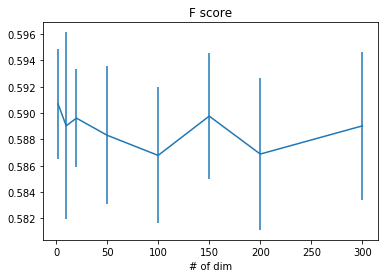

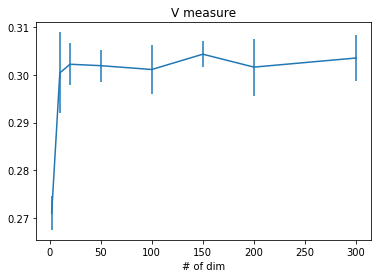

In [171]:
# graph for varying parameters for semeval 
x = [2, 10, 20, 50, 100, 150, 200, 300]
fscore = [0.590692, 0.58903, 0.589615, 0.588316, 0.586784, 0.589768, 0.586886, 0.589028]
vmeasure = [0.2711, 0.3004, 0.3022, 0.3019, 0.3011, 0.3043, 0.3016, 0.3035]
std_f = [0.00417304, 0.00710812, 0.00374563, 0.00522535, 0.00516875, 0.00481436, 0.00576168, 0.00560293]
std_v = [0.00353412, 0.00848764, 0.0044, 0.00333017, 0.00520481, 0.00275862, 0.00595315, 0.00490408]
plt.errorbar(x, fscore, yerr=std_f)
plt.xlabel('# of dim')
plt.title("F score")
plt.show()
plt.errorbar(x, vmeasure, yerr=std_v)
plt.xlabel('# of dim')
plt.title("V measure")
plt.show()

In [210]:
lambs = [1000, 5000, 10000, 15000]
dims = [2, 10, 20] #[2, 10, 20, 50, 100, 150]
fscore = np.zeros((len(dims), len(lambs)))
vmeasure = np.zeros((len(dims), len(lambs)))
average = np.zeros((len(dims), len(lambs)))
std_f = np.zeros((len(dims), len(lambs)))
std_v = np.zeros((len(dims), len(lambs)))
std_a = np.zeros((len(dims), len(lambs)))
dim = None
lamb = None
with open('scores.temp', 'r') as infile: 
    for line in infile: 
        contents = line.strip().split()
        if line.startswith("Scores"):
            dim = dims.index(int(contents[3].replace(',','')))
            lamb = lambs.index(int(contents[-1]))
        if line.startswith("FScore"): 
            fscore[dim, lamb] = float(contents[1].replace(',',''))
            std_f[dim, lamb] = float(contents[2])
        if line.startswith("Vmeasure"): 
            vmeasure[dim, lamb] = float(contents[1].replace(',',''))
            std_v[dim, lamb] = float(contents[2])
        if line.startswith("Average"): 
            average[dim, lamb] = float(contents[1].replace(',',''))
            std_a[dim, lamb] = float(contents[2])

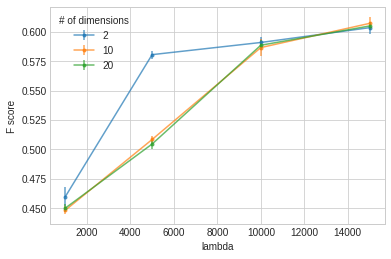

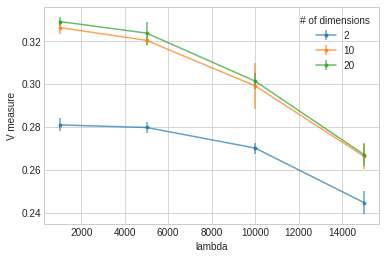

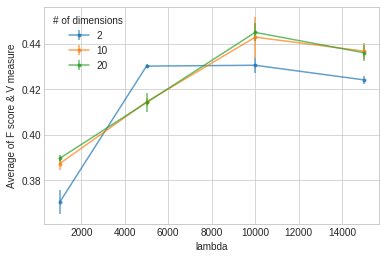

In [219]:
plt.style.use('seaborn-whitegrid')
for i in range(len(dims)): 
    plt.errorbar(lambs, fscore[i], yerr=std_f[i], label=str(dims[i]), marker='.', alpha=0.7)
plt.xlabel('lambda')
plt.ylabel("F score")
plt.legend(title="# of dimensions")
plt.show()
for i in range(len(dims)): 
    plt.errorbar(lambs, vmeasure[i], yerr=std_v[i], label=str(dims[i]), marker='.', alpha=0.7)
plt.xlabel('lambda')
plt.ylabel("V measure")
plt.legend(title="# of dimensions")
plt.show()
for i in range(len(dims)): 
    plt.errorbar(lambs, average[i], yerr=std_a[i], label=str(dims[i]), marker='.', alpha=0.7)
plt.xlabel('lambda')
plt.ylabel("Average of F score & V measure")
plt.legend(title="# of dimensions")
plt.show()

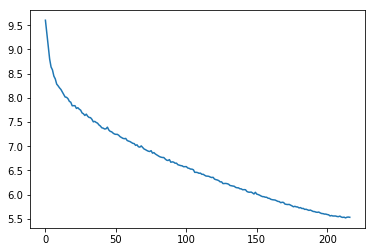

In [177]:
# finetuning perplexity
perplexities = [9.6033,9.3374,9.0680,8.8015,8.6381,8.5772,8.4489,8.3912,8.2842,8.2482,8.2068,8.1734,8.1197,8.0693,8.0173,8.0116,7.9831,7.9276,7.9096,7.8365,7.8388,7.8380,7.7814,7.7969,7.7666,7.7462,7.6892,7.6706,7.6361,7.6635,7.6200,7.5950,7.5912,7.5570,7.5047,7.5141,7.4925,7.4773,7.4405,7.4181,7.3822,7.3741,7.3570,7.3610,7.3947,7.3357,7.3075,7.2990,7.2724,7.2529,7.2458,7.2466,7.2277,7.1981,7.1796,7.1636,7.1563,7.1619,7.1197,7.1067,7.0973,7.0788,7.0608,7.0550,7.0184,7.0297,6.9902,6.9818,7.0076,6.9761,6.9440,6.9300,6.9129,6.8988,6.8916,6.9088,6.8578,6.8692,6.8408,6.8220,6.8049,6.7860,6.7751,6.7683,6.7675,6.7375,6.7135,6.7057,6.7242,6.6702,6.6780,6.6723,6.6500,6.6512,6.6193,6.6098,6.6010,6.5963,6.5779,6.5789,6.5796,6.5515,6.5439,6.5287,6.5273,6.5146,6.4608,6.4625,6.4563,6.4419,6.4453,6.4209,6.4210,6.4010,6.3848,6.3829,6.3786,6.3639,6.3545,6.3591,6.3218,6.3107,6.3034,6.2906,6.2648,6.2654,6.2293,6.2301,6.2326,6.2267,6.2166,6.1901,6.1838,6.1786,6.1738,6.1504,6.1429,6.1413,6.1224,6.1196,6.1015,6.1047,6.1014,6.0665,6.0532,6.0506,6.0541,6.0365,6.0142,6.0494,6.0113,6.0026,5.9901,5.9736,5.9600,5.9586,5.9478,5.9466,5.9270,5.9234,5.9041,5.8964,5.8934,5.8892,5.8762,5.8613,5.8572,5.8340,5.8438,5.8390,5.8063,5.7998,5.7965,5.7989,5.7847,5.7688,5.7500,5.7593,5.7488,5.7458,5.7265,5.7334,5.7141,5.7163,5.6960,5.6992,5.6886,5.6756,5.6828,5.6679,5.6534,5.6506,5.6395,5.6357,5.6406,5.6236,5.6111,5.6086,5.5990,5.5990,5.5900,5.5842,5.5609,5.5695,5.5596,5.5592,5.5593,5.5489,5.5465,5.5573,5.5375,5.5308,5.5352,5.5200,5.5350,5.5378,5.5330]
plt.plot(range(len(perplexities)), perplexities)

In [20]:
# many dimensions
gap_string = '-4.0107399  -3.93578724 -3.89623887 -3.86267706 -3.83328132 -3.80941944 -3.79058619 -3.77362554'
s_string = '0.00426476 0.00461793 0.00371121 0.00513697 0.00448555 0.00540778 0.00477219 0.00400521'
gaps = np.fromstring(gap_string, sep=' ')
s = np.fromstring(s_string, sep=' ')

<ErrorbarContainer object of 3 artists>

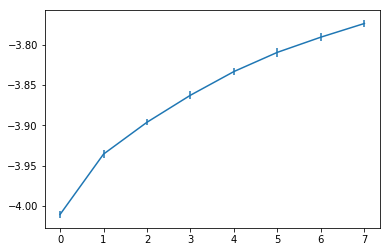

In [21]:
plt.errorbar(range(len(gaps)), gaps, yerr=s)

In [23]:
# many dimensions
gap_string = '-4.1901545  -4.11671565 -4.06378431 -4.0327042  -4.00705237 -3.97728714 -3.96163313 -3.94492973'
s_string = '0.00354354 0.00473717 0.00402972 0.00372008 0.00511827 0.00394131 0.00415058 0.00415936'
gaps = np.fromstring(gap_string, sep=' ')
s = np.fromstring(s_string, sep=' ')

<ErrorbarContainer object of 3 artists>

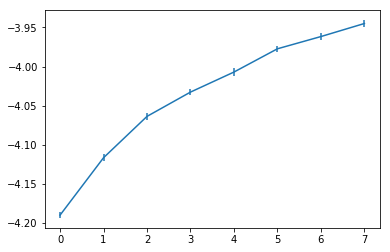

In [24]:
plt.errorbar(range(len(gaps)), gaps, yerr=s)

In [50]:
# two dimensions
gap_string = '-6.37123341 -6.29598846 -6.44522912 -6.29095849 -6.30385067 -6.33322015 -6.32872987 -6.34821033'
s_string = '0.02914743 0.03005807 0.02559584 0.02636324 0.02514875 0.02733542 0.02703964 0.02136141'
gaps = np.fromstring(gap_string, sep=' ')
s = np.fromstring(s_string, sep=' ')

<ErrorbarContainer object of 3 artists>

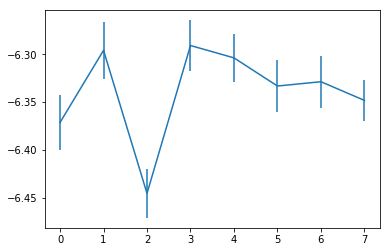

In [51]:
plt.errorbar(range(len(gaps)), gaps, yerr=s)

In [129]:
# rss 100 dim
rss_string = '220119.83584386963, 201505.73115031936, 191882.86428734468, 184066.4643399403, 179164.20613757058, 174457.55584577992, 171135.23726765593, 167526.9786458712'
rss1 = np.fromstring(rss_string, sep=', ')

Text(0.5,1,'expose.v')

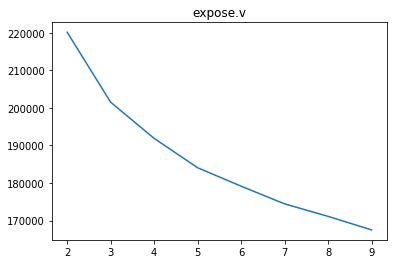

In [130]:
# expose has 2 senses
plt.errorbar(range(2, 10), rss1)
plt.title("expose.v")

In [131]:
# rss 20 dim
rss_string = '136054.00146580275, 118026.08958597093, 109386.87149109345, 101007.63957972618, 94883.96708762775, 89955.82776011301, 85758.63979316902, 82699.07946296215'
rss2 = np.fromstring(rss_string, sep=', ')

Text(0.5,1,'expose.v')

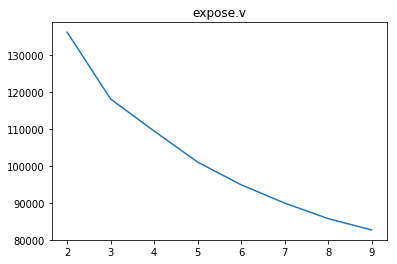

In [132]:
plt.errorbar(range(2, 10), rss2)
plt.title("expose.v")

In [133]:
# rss 2 dim
rss_string = '33504.020782501066, 16343.870985012683, 12296.714605062605, 9014.801676160092, 7375.092213188087, 6233.159871506173, 5382.218881573552, 4724.133394758204'
rss3 = np.fromstring(rss_string, sep=', ')

Text(0.5,1,'expose.v')

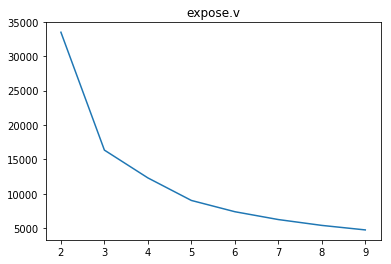

In [134]:
plt.errorbar(range(2, 10), rss3)
plt.title("expose.v")

In [135]:
rss2/rss3

array([ 4.06082608,  7.22142812,  8.89561765, 11.20464356, 12.86546179,
       14.43181783, 15.93369606, 17.50566137])

In [69]:
rss1/rss2

array([1.61788579, 1.70729821, 1.75416722, 1.8223024 , 1.88824531,
       1.93936913, 1.99554514, 2.02574176])

<ErrorbarContainer object of 3 artists>

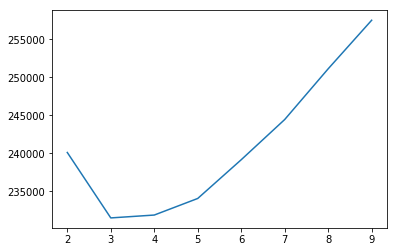

In [136]:
aic1 = rss1 + 10000*np.arange(2, 10)
plt.errorbar(range(2, 10), aic1)

<ErrorbarContainer object of 3 artists>

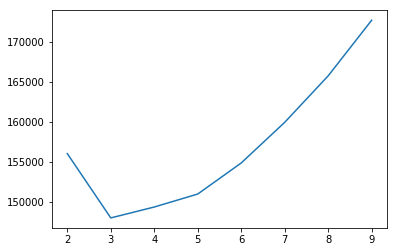

In [140]:
aic2 = rss2 + 10000*np.arange(2, 10)
plt.errorbar(range(2, 10), aic2)

<ErrorbarContainer object of 3 artists>

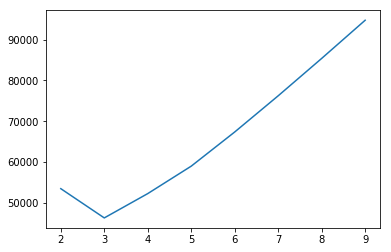

In [138]:
aic3 = rss3 + 10000*np.arange(2, 10)
plt.errorbar(range(2, 10), aic3)

In [120]:
# rss 2 dim
rss_string = '36267.14182179117, 18335.342336441976, 14096.235410854419, 10828.739353016164, 8693.50271245154, 7250.875816064718, 6349.9700898129795, 5608.475442365755'
rss3 = np.fromstring(rss_string, sep=', ')

Text(0.5,1,'idea.n')

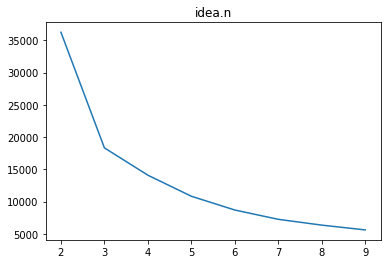

In [121]:
# idea has 5 senses
plt.errorbar(range(2, 10), rss3)
plt.title("idea.n")

<ErrorbarContainer object of 3 artists>

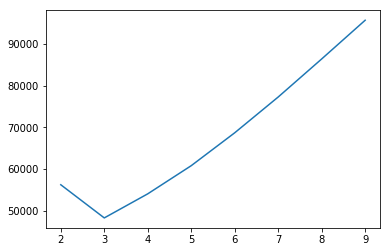

In [122]:
aic3 = rss3 + 10000*np.arange(2, 10)
plt.errorbar(range(2, 10), aic3)

In [123]:
# rss 20 dim
rss_string = '151024.86438994572, 133473.8207083117, 117936.15705943159, 105994.87244312695, 98467.49769740348, 93274.53659802591, 88389.27662271864, 83821.00634554186'
rss2 = np.fromstring(rss_string, sep=', ')

Text(0.5,1,'idea.n')

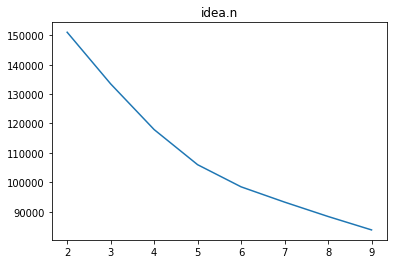

In [124]:
plt.errorbar(range(2, 10), rss2)
plt.title("idea.n")

<ErrorbarContainer object of 3 artists>

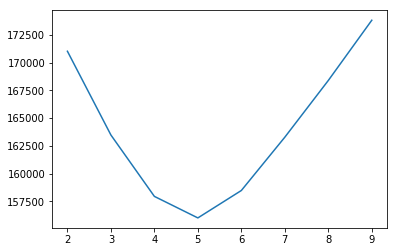

In [125]:
aic2 = rss2 + 10000*np.arange(2, 10)
plt.errorbar(range(2, 10), aic2)

In [126]:
# rss 100 dim
rss_string = '236045.30797319912, 218375.70904823695, 204670.42662730743, 192686.5650282998, 185965.28450313574, 181403.4874493549, 176036.8983143213, 171419.1199453919'
rss1 = np.fromstring(rss_string, sep=', ')

Text(0.5,1,'idea.n')

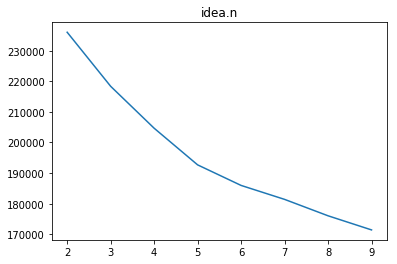

In [127]:
plt.errorbar(range(2, 10), rss1)
plt.title("idea.n")

<ErrorbarContainer object of 3 artists>

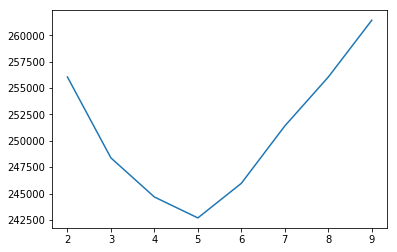

In [128]:
aic1 = rss1 + 10000*np.arange(2, 10)
plt.errorbar(range(2, 10), aic1)